
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Thur, September 14, submitted via Canvas by 11:59 pm</p>
### <p style="text-align: center;">Jayaj Poudel and Kevin Yee</p>
Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer

**System 1: Fake reviews detection**
This task is an example of classification. By analyzing the content of the review, users' purchase history, likes, and stars and other features - Amazon can use these parameters to classify if a review is fake or real.

**System 2:Inventory forecasting**
This task is an example of regression; a numerical answer is given as an output to determine how many copies of each product should be kept at any time.
Data that would be helpful would include:
1. Monthly sales history in the past.
2. Sales made dependant on the location of purchase

This would allow each distribution to be properly stocked based on previous data.

# Question 2.a: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

By taking the logarithm of both sides, we arrive at:

$$ \log(p(t)) = \log(\frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}}) $$

# Question 2.b: Bivariate Normal Distribution (10 pts)

Suppose $X$ and $Y$ are two random variables whose joint distribution is Normal (Gaussian), centered at (0,0) and with correlation $\rho$. (See "Bivariate Case" in the Wikipedia entry for "Multivariate Normal Distribution" for the equation, or use just use the vector form given in the class notes, with $\sigma_{12} = \sigma_{21} = \rho \sigma_{x} \sigma_{y} $). Consider 2 cases:
1. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0$
2. $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

a. (4 pts) Obtain contour plots for each of the two distributions using  Python (http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.kdeplot.html). 

b. (3 pts) View 3-D plots for the two distributions from at least two different viewing perspectives each (http://matplotlib.org/examples/mplot3d/rotate_axes3d_demo.html).

c.  (3 pts) Consider the bivariate Normal Distribution given in part (ii). We can rotate this distribution by using the rotation matrix
\begin{equation} \left[ \begin{array}{cc} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{array} \right] \end{equation}
Check Wikipedia for more info on rotation matrices. This is the same as creating two new random variables:
\begin{aligned}
U = X \cos(\theta) - Y \sin(\theta) \\
V = X \sin(\theta) + Y \cos(\theta)
\end{aligned}
For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

## Answer


For reference, the Covariance matrix is defined below:
![](http://i.markdownnotes.com/image_EOn9wA1.png)


####Case 1

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline

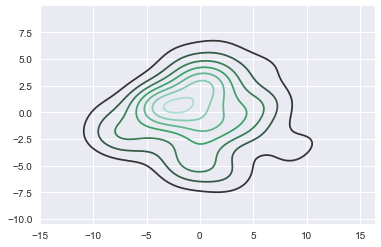

In [23]:
mean = [0,0]
cov = [(16, 0), (0,9)]
x, y= np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, y)

####Case 2 $\sigma_x^2 = 16; \sigma_y^2 = 9; \rho = 0.5$

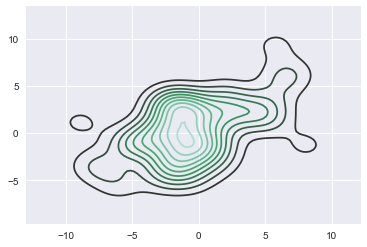

In [24]:
mean = [0,0]
cov = [(16, 6), (6,9)]
x, y= np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x, y)


###(b) View 3-D plots for the two distributions from at least two different viewing perspectives each 

3D plot of Case 1

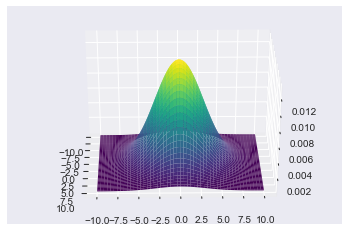

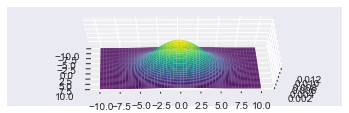

In [25]:
#https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

viewangle = [30, 60];
for i in range(len(viewangle)):
    fig = plt.figure()
    ax = fig.add_subplot((i+1)*100 + 11, projection='3d')

    #Set Mean and Variance
    mean = [0,0]
    cov = [(16, 0), (0,9)]

    #Create grid and multivariate normal
    x = np.linspace(-10,10,500)
    y = np.linspace(-10,10,500)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal(mean, cov)
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
   
    ax.view_init(viewangle[i], angle)
    plt.draw()

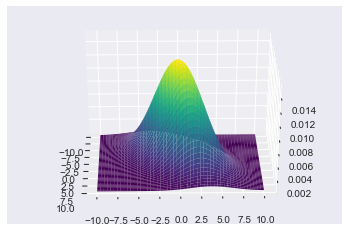

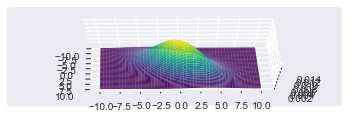

In [26]:
#https://stackoverflow.com/questions/38698277/plot-normal-distribution-in-3d

import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

viewangle = [30, 60];
for i in range(len(viewangle)):
    fig = plt.figure()
    ax = fig.add_subplot((i+1)*100 + 11, projection='3d')

    #Set Mean and Variance
    mean = [0,0]
    cov = [(16, 6), (6,9)]

    #Create grid and multivariate normal
    x = np.linspace(-10,10,500)
    y = np.linspace(-10,10,500)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    rv = multivariate_normal(mean, cov)
    ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)


    ax.view_init(viewangle[i], angle)
    plt.draw()

####(c) For a rotation of -45 degrees, plot the rotated distribution and fit a bivariate gaussian to this rotated distribution.

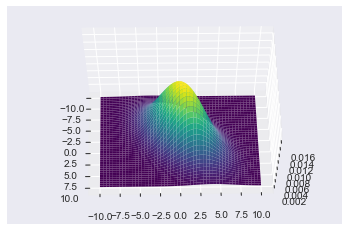

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#Set Mean and Variance
mean = [0,0]
cov = [(16, 6), (6,9)]

#generate multivariable gaussian
x, y= np.random.multivariate_normal(mean, cov, size=50).T

#Create Rotation Matrix
def rotgauss(x,y, rotation):
    rotation = np.deg2rad(rotation);
    U = x * np.cos(rotation) - y * np.sin(rotation)
    V = x * np.sin(rotation) + y * np.cos(rotation)
    return U, V       

U,V = rotgauss(x, y, -45)

#update mean and covariance
mean = [U.mean(), V.mean()]
cov = [(np.var(U), 0.5 * np.std(U) * np.std(V)), (0.5 * np.std(U) * np.std(V),np.var(V))]


#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(mean, cov)


ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)

# rotate the axes and update

ax.view_init(60, angle)
plt.draw()

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the Boston House Prices dataset and linear models in python.



In [28]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

boston = datasets.load_boston()

X = boston.data
y = boston.target

The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.


In [29]:
X.shape
print "Number of Rows",
print X.shape[0];
print "Number of Columns",
print X.shape[1];
print "First 5 rows:"
colnames = ["Crime Rate", "Land Zone", "Non-Retail Business", "Near River",
           "Nitric Concentration", "Rooms", "Age", "Distance from Employer", "Highway Accessability",
           "Tax Rate", "Pupil-Teacher Ratio", "Blacks by Town", "Lower status of population"]
pd.set_option('display.max_columns', 13)
df = pd.DataFrame(X, columns = colnames)
df.head()

Number of Rows 506
Number of Columns 13
First 5 rows:


,Crime Rate,Land Zone,Non-Retail Business,Near River,Nitric Concentration,Rooms,Age,Distance from Employer,Highway Accessability,Tax Rate,Pupil-Teacher Ratio,Blacks by Town,Lower status of population
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.


In [30]:
lin_reg = LinearRegression()
housing_predictions = lin_reg.fit(X, y)

#Verify that these coefficients make sense
print "Linear Regression Coefficients"
for i in range(len(lin_reg.coef_)):
    print colnames[i],":", lin_reg.coef_[i]
print 
print "Mean Squared Error"

#pint the mse error for linear regression model
housing_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, housing_predictions)
print lin_mse

Linear Regression Coefficients
Crime Rate : -0.10717055656
Land Zone : 0.0463952195298
Non-Retail Business : 0.0208602395322
Near River : 2.68856139932
Nitric Concentration : -17.7957586603
Rooms : 3.80475246026
Age : 0.000751061703319
Distance from Employer : -1.47575879652
Highway Accessability : 0.305655038339
Tax Rate : -0.0123293463053
Pupil-Teacher Ratio : -0.953463554691
Blacks by Town : 0.00939251272219
Lower status of population : -0.525466632901

Mean Squared Error
21.8977792177


c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

In [31]:

#Split Data set
training_set = X[:400]
testing_set = X[400:]

#split labels
training_labels = y[:400]
testing_labels = y[400:]

#Train on just training set
lin_reg = LinearRegression()
lin_reg.fit(training_set, training_labels)

housing_predictions = lin_reg.predict(training_set)
lin_mse = mean_squared_error(training_labels, housing_predictions)

print "MSE of Training Set to Training Label",lin_mse


#Use training set model on testing set
housing_predictions = lin_reg.predict(testing_set)
lin_mse = mean_squared_error(testing_labels, housing_predictions)

print "MSE of Testing Set to Testing Label",lin_mse


MSE of Training Set to Training Label 22.3052255842
MSE of Testing Set to Testing Label 38.1643386432


d.  (5 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

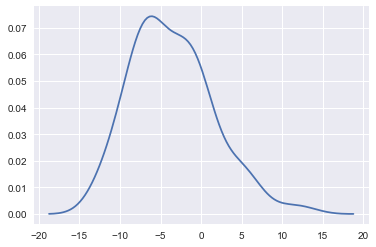

In [32]:
residual_error = testing_labels - housing_predictions
sns.kdeplot(residual_error)

MLR is not a reasonable model for the following reasons:

From the MSE of the Training set and Testing set, we seem to be underfitting the data.

Furthermore, by looking at the distribution of residuals, we see that the residual plots are not randomly dispersed. A non-random inverted U suggest that a non-linear model is more appropriate

Source: http://stattrek.com/regression/residual-analysis.aspx?Tutorial=AP

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [33]:
X = np.concatenate((X, np.square(X)), axis=1)

#Split Data set
training_set = X[:400]
testing_set = X[400:]

#split labels
training_labels = y[:400]
testing_labels = y[400:]

#Train on just training set
lin_reg = LinearRegression()
lin_reg.fit(training_set, training_labels)

housing_predictions = lin_reg.predict(training_set)
lin_mse = mean_squared_error(training_labels, housing_predictions)

print "MSE of Training Set to Training Label",lin_mse


#Use training set model on testing set
housing_predictions = lin_reg.predict(testing_set)
lin_mse = mean_squared_error(testing_labels, housing_predictions)

print "MSE of Testing Set to Testing Label",lin_mse

MSE of Training Set to Training Label 14.4689173781
MSE of Testing Set to Testing Label 32.9465487206


## Answer